In [1]:
from tqdm.notebook import tqdm as notebook_tqdm
from detectron2.config import LazyConfig, instantiate
from detectron2.checkpoint import DetectionCheckpointer
from demo.demo import VisualizationDemo, get_parser
import numpy as np
from detectron2.data.detection_utils import read_image
import matplotlib.pyplot as plt
import cv2
import os
config_file = 'projects/dino/configs/odor3_fn_l_lrf_384_fl4_5scale_50ep.py'
ckpt_pth = 'trained-models/dino-focal/focaldino_ep18.pth'

try:
    cfg = LazyConfig.load(config_file)
except AssertionError as e:
    if str(e).startswith('Dataset '):
        pass
    else:
        raise e
model = instantiate(cfg.model)
model.to(cfg.train.device)
checkpointer = DetectionCheckpointer(model)
checkpointer.load(ckpt_pth)
model.eval()
demo = VisualizationDemo(
    model=model,
    min_size_test=800,
    max_size_test=1333,
    img_format='RGB',
    metadata_dataset='odor_test')

def treat_grayscale(img):
    if len(img.shape) == 2:
        return np.stack((img,)*3, axis=-1)
    else:
        return img

(1591, 2000, 3)
(1591, 2000, 3)
{'instances': Instances(num_instances=9, image_height=1591, image_width=2000, fields=[pred_boxes: Boxes(tensor([[ 673.3104,  952.7542,  771.3109, 1032.6776],
        [ 400.1694,  853.4324,  606.4144, 1058.6914],
        [ 554.6137,  771.5962,  653.3821,  872.3314],
        [ 552.0690,  508.0670,  818.7095,  915.3094],
        [ 400.1694,  853.4324,  606.4144, 1058.6914],
        [ 674.7004,  952.9052,  770.7397, 1031.5629],
        [ 674.5782,  952.3851,  770.8661, 1031.4858],
        [ 766.5170, 1003.4362,  800.1599, 1029.2527],
        [ 675.0374,  952.8353,  771.0124, 1031.6501]], device='cuda:0')), scores: tensor([0.9511, 0.8609, 0.5336, 0.1087, 0.0908, 0.0908, 0.0774, 0.0519, 0.0501],
       device='cuda:0'), pred_classes: tensor([ 96,  90, 103, 103,  40,  96,  96,  96,  96], device='cuda:0')])}


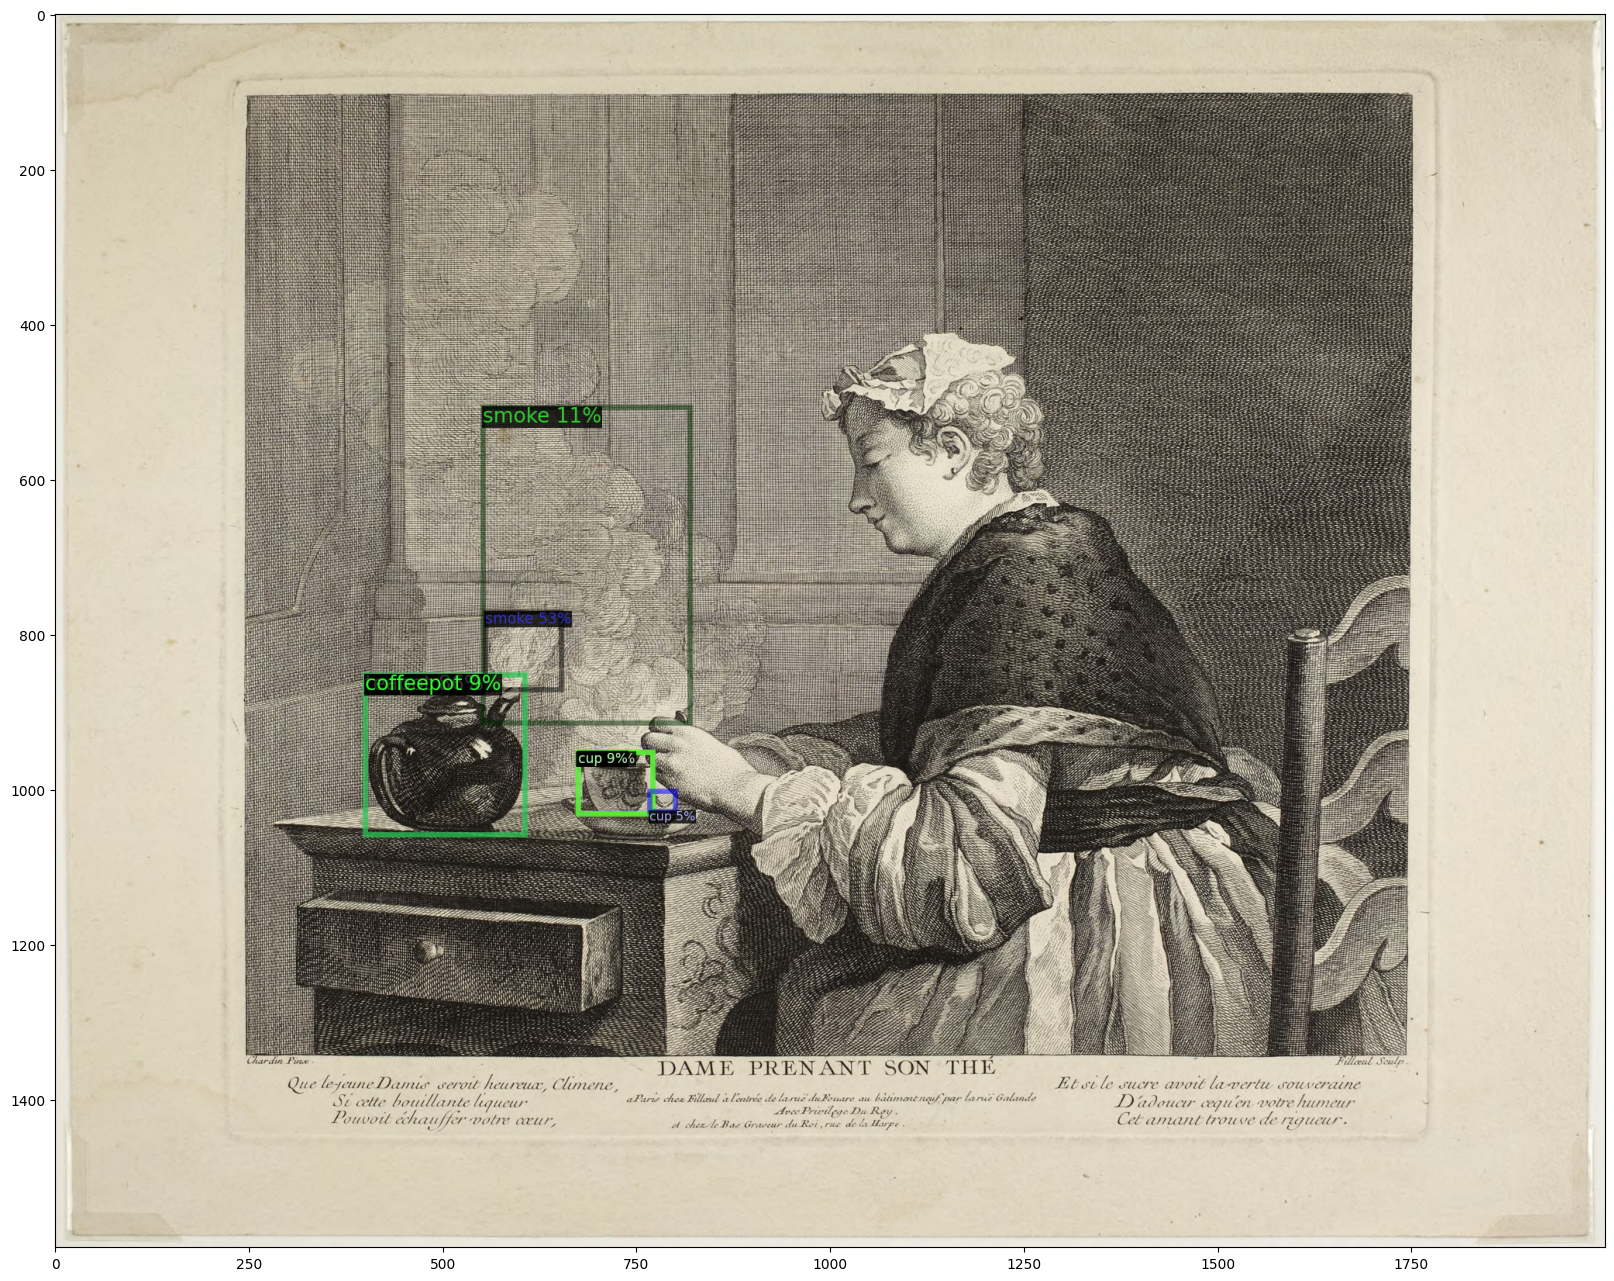

In [4]:
#link = 'https://upload.wikimedia.org/wikipedia/commons/6/62/Gaspar_Peeter_Verbruggen_d.%C3%86._-_Blomsterkrans_med_Johannes_D%C3%B8beren_-_KMSsp332_-_Statens_Museum_for_Kunst.jpg'
# link = 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Josefa_d%27ayala_%28detta_di_%C3%B3bidos%29%2C_natura_morta_con_cocomero_e_pere%2C_1670_ca.jpg/800px-Josefa_d%27ayala_%28detta_di_%C3%B3bidos%29%2C_natura_morta_con_cocomero_e_pere%2C_1670_ca.jpg'
link = 'https://puam-loris.aws.princeton.edu/loris/INV33883.jp2/full/full/0/default.jpg'

img = read_image(link)
print(img.shape)
img = treat_grayscale(img)
print(img.shape)
predictions, visualized_output = demo.run_on_image(img, 0.05)
print(predictions)
plt.figure(figsize=(20,20))
plt.imshow(visualized_output.get_image()[:,:,::-1])